In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [127]:
df = pd.read_csv("data.csv")

In [128]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [129]:
df =  df.drop(['area_type','availability','society','balcony'],axis='columns')

In [130]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [131]:
df.shape

(13320, 5)

In [132]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [133]:
df = df.dropna()


In [134]:
df.shape

(13246, 5)

In [135]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [136]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [137]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [138]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [139]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [140]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [141]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [142]:
df[~df['total_sqft'].apply(isFloat)].sample(5)

,location,size,total_sqft,bath,price,bhk
5179,Rachenahalli,1 BHK,660 - 700,1.0,32.640,1
12161,Kanakapura,1 BHK,712 - 938,1.0,35.475,1
11764,Begur Road,4 BHK,2400 - 2600,6.0,122.500,4
6987,Chandapura,2 BHK,598 - 958,2.0,25.290,2
10050,Old Madras Road,5 BHK,4500 - 5540,7.0,287.000,5


In [143]:
def convert_sqft_to_num(x):
    tokens = x.split('-')

    if len(tokens)== 2:
         return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [144]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(x))

In [145]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk
5696,Bommasandra,2 BHK,1014.0,2.0,35.00,2
11763,Sadashiva Nagar,5 Bedroom,9600.0,7.0,2736.00,5
10748,Kothanur,2 BHK,1095.0,2.0,55.00,2
824,7th Phase JP Nagar,2 BHK,918.0,2.0,50.49,2
3281,Devarabeesana Halli,3 BHK,1672.0,3.0,150.00,3
11981,Kumaraswami Layout,7 Bedroom,3200.0,7.0,150.00,7
6154,Lingadheeranahalli,4 BHK,2245.0,4.0,154.00,4
13007,Sri Balaji Krupa Layout,4 Bedroom,1750.0,4.0,263.00,4
11684,Yelahanka New Town,2 Bedroom,600.0,2.0,80.00,2
6554,Raja Rajeshwari Nagar,2 BHK,1178.0,2.0,75.00,2


In [146]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [147]:
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11252,Banashankari Stage VI,3 BHK,1392.0,3.0,69.46,3,4989.942529
1546,Kadugodi,4 Bedroom,3750.0,4.0,210.00,4,5600.000000
8377,Badavala Nagar,3 BHK,1842.0,3.0,115.00,3,6243.213898
2799,Sarjapur Road,4 Bedroom,1152.0,4.0,230.00,4,19965.277778
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333


In [148]:
len(df.location.unique())

1304

In [149]:
loc_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [150]:
loc_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [151]:
len(loc_stats[loc_stats <=10])

1063

In [152]:
loc_stat_less_than_10 = loc_stats[loc_stats <=10]

In [153]:
loc_stat_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [154]:
len(df.location.unique())

1304

In [155]:
df['location'] = df['location'].apply(lambda x : 'other' if x in loc_stat_less_than_10 else x )

In [156]:
len(df.location.unique())

242

In [157]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10949,Green Glen Layout,3 BHK,1740.0,3.0,80.0,3,4597.701149
4460,Begur,3 BHK,1445.0,2.0,47.1,3,3259.515571
12164,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000.000000
12742,other,4 BHK,4750.0,6.0,948.0,4,19957.894737
7300,Banashankari,2 BHK,1040.0,2.0,45.0,2,4326.923077
8156,KR Puram,4 Bedroom,1200.0,4.0,83.0,4,6916.666667
10794,other,3 BHK,1626.6,3.0,133.0,3,8176.564613
11558,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333.333333
11071,other,4 Bedroom,1650.0,2.0,140.0,4,8484.848485
1573,Kanakpura Road,2 BHK,900.0,2.0,46.0,2,5111.111111


In [161]:
len(df[df.total_sqft /df.bhk < 300].head())

5

In [159]:
df1 = df[~(df['total_sqft']/df['bhk']<300)]

In [160]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [172]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [174]:
df1.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10423,Hosa Road,2 BHK,1170.0,2.0,65.0,2,5555.555556
12954,other,1 BHK,540.0,1.0,22.5,1,4166.666667
889,Basaveshwara Nagar,5 Bedroom,4500.0,5.0,415.0,5,9222.222222
5998,Kammanahalli,4 Bedroom,1800.0,2.0,280.0,4,15555.555556
8833,Hebbal Kempapura,5 Bedroom,2400.0,5.0,200.0,5,8333.333333


In [176]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st) ) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df1)
df2.shape

(10244, 7)

In [191]:
df2.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3049,Hennur Road,3 BHK,2350.0,3.0,174.00,3,7404.255319
6988,Uttarahalli,2 BHK,1040.0,2.0,36.40,2,3500.000000
8131,other,3 Bedroom,1500.0,3.0,115.00,3,7666.666667
6398,Singasandra,3 BHK,1440.0,2.0,65.00,3,4513.888889
5622,Raja Rajeshwari Nagar,2 BHK,1185.0,2.0,40.17,2,3389.873418


In [185]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue' ,label = '2 BHK' ,s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '*' ,color = 'red' ,label = '3 BHK' ,s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()



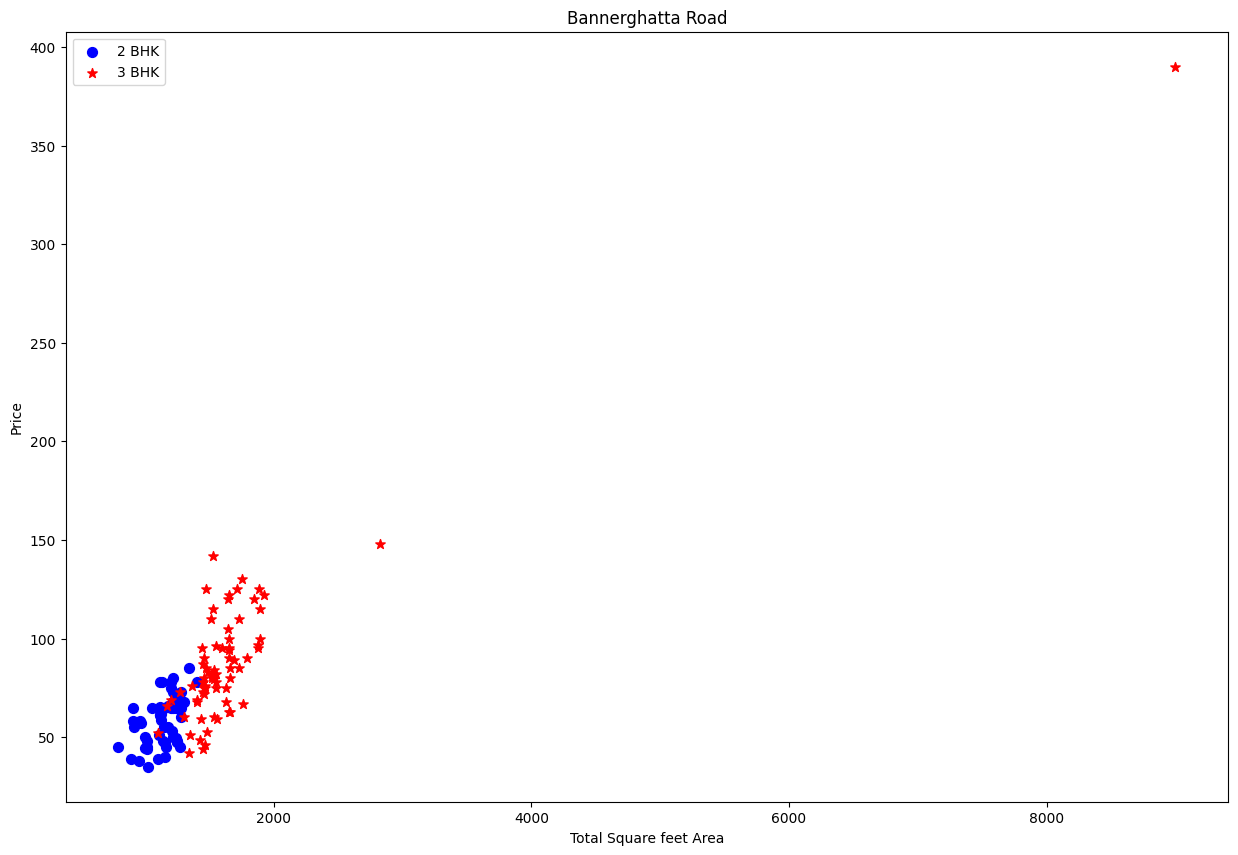

In [206]:
plot_scatter_chart(df2,"Bannerghatta Road")

In [193]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_states = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_states[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_states.get(bhk-1)
            if stats and stats['count']>5:
                       exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft< (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df3 = remove_bhk_outlier(df2)

In [203]:
df3.sample(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8878,other,4 Bedroom,2675.0,4.0,290.0,4,10841.121495
5073,Marathahalli,2 BHK,1170.0,2.0,85.0,2,7264.957265
719,Banashankari,2 BHK,1460.0,2.0,70.0,2,4794.520548
942,Bannerghatta Road,3 BHK,1640.0,3.0,105.0,3,6402.439024


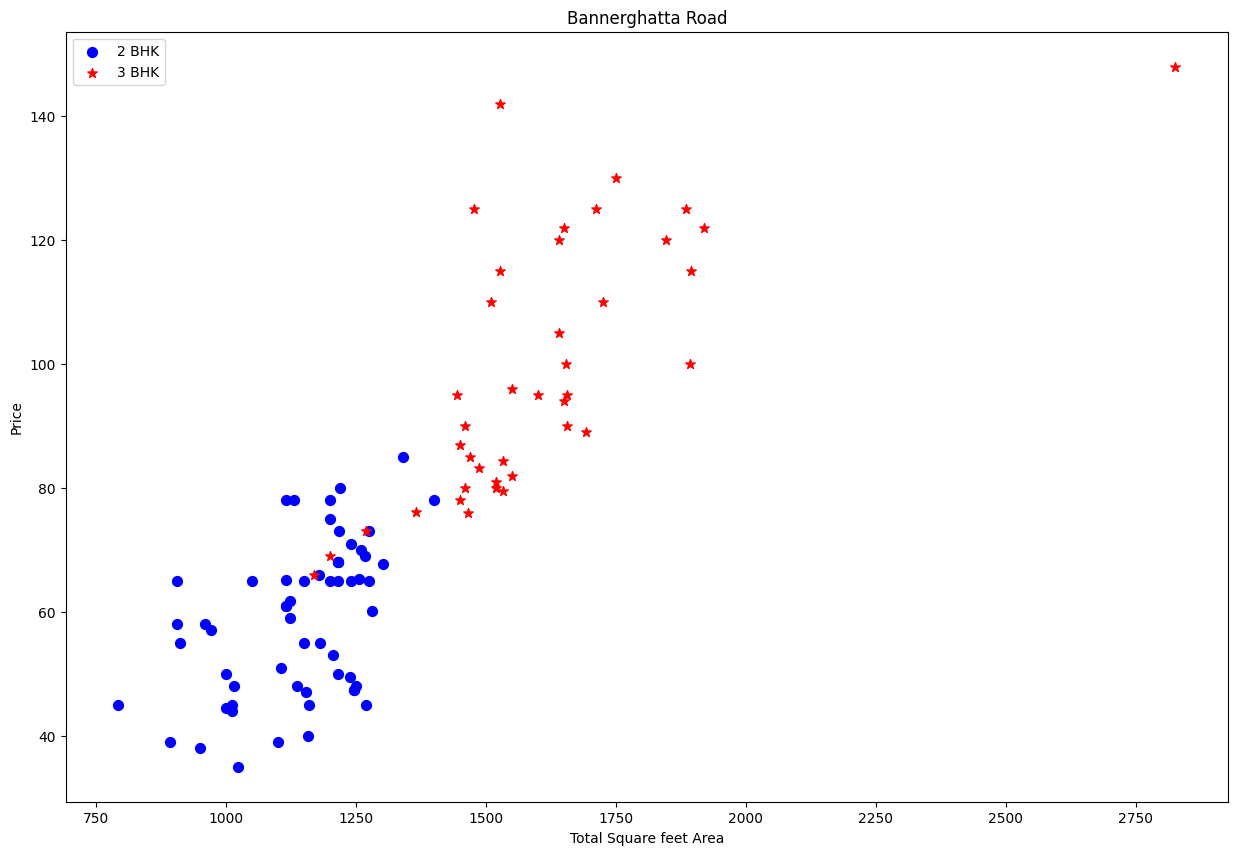

In [205]:
plot_scatter_chart(df3,"Bannerghatta Road")

In [209]:
df4 = df3[df3.bath < df3.bhk + 2]
df4.shape

(7264, 7)

In [245]:
df4.sample(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8549,other,2 Bedroom,1500.0,1.0,160.0,2,10666.666667
5411,Panathur,2 BHK,1438.0,2.0,100.0,2,6954.102921
3518,Indira Nagar,3 Bedroom,1440.0,3.0,275.0,3,19097.222222
1036,Begur Road,2 BHK,1200.0,2.0,46.8,2,3900.000000


In [246]:
df4 = df4.drop(['size','price_per_sqft'], axis = 'columns')
df4.sample(5)

,location,total_sqft,bath,price,bhk
2234,Electronic City Phase II,1116.0,2.0,40.00,2
782,Banashankari Stage III,3000.0,6.0,150.00,6
3687,Jigani,918.0,2.0,55.00,2
2688,Haralur Road,1243.0,2.0,46.00,2
5689,Raja Rajeshwari Nagar,1303.0,2.0,55.78,2


In [250]:
dummies =  pd.get_dummies(df4.location)
dummies.shape

(7264, 242)

In [257]:
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')

In [258]:
df5.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
df5 = df5.drop('location',axis= 'columns')
df5

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
X = df5.drop('price',axis= 'columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
y = df5['price']
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

Step 2 - ML MODEL CREATION

In [264]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [265]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [266]:
model.score(X_test,y_test)

0.7696224927820372

k fold method to check which algo is best

In [267]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression(),X,y,cv = cv)


array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [272]:
df5.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
def predict_price(location,sqft,bath,bhk):
     loc_index = np.where(X.columns == location)[0][0]

     x = np.zeros(len(X.columns))
     x[0] = sqft
     x[1] = bath 
     x[2] = bhk 
     
     if loc_index >=0:
          x[loc_index] = 1

     return model.predict([x])[0]    

In [277]:
predict_price("Vijayanagar",1200,1,2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.00547153097456

In [279]:
import pickle 
with open('price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [280]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))